# Luke

## Research question/interests

Briefly describe your research question or interests here.

I am interested at looking more into the numbers with the deaths and injureies in each state. It will be interesting to see a geographical map of the total incidents, and to see if the states surrounding the "highest violence" state also have a high number of incidents possibly affected by the most violent state. It will also be good to look at the percent of violence per population in each state and to see if there is a similar coloring of a geographical map to just the total violence. This could show a possible relation between a states violence and its surrounding states.

# Milestone 3
## Task 1


In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
df.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2015849,May 26 2021,Illinois,Chicago,7200 block of S Princeton Ave,0,4
1,2015730,May 26 2021,California,San Jose,101 W Younger Ave,10,0
2,2014343,May 24 2021,Michigan,Inkster,27000 block of Rosewood St,2,2
3,2014381,May 24 2021,Ohio,West Jefferson,127 Jackson St,4,0
4,2012971,May 23 2021,Illinois,Chicago,3344 W Ohio St,0,4


In [2]:
df.describe()

,incident_id,killed,injured
count,2.930000e+03,2930.000000,2930.000000
mean,1.099382e+06,1.072696,4.188055
std,5.874708e+05,2.156834,8.395836
min,9.219400e+04,0.000000,0.000000
25%,5.758988e+05,0.000000,3.000000
50%,1.143330e+06,1.000000,4.000000
75%,1.678962e+06,1.000000,5.000000
max,2.015849e+06,59.000000,441.000000


From the description of the data the we can see that there are a lot of incidents meaning a lot of rows to look at. Also looking at the max it appears that there may be some outliers depending on how this data will be looked at. 

In [3]:
df.nunique()

incident_id       2930
incident_date     1571
state               48
city_or_county     861
address           2903
killed              19
injured             26
dtype: int64

In [4]:
print(df['state'].nunique())

48


We can also see here that not all states appear in this dataset. Looking into a list but there are only 47 of the 50 US states plus the district of columbia in this data set and appears to be missing Hawaii, New Hampshire, and North Dakota. This will need to be noted when looking at the states of the US. District of Columbia may need to be removed from the dataset if looking specifically at the states.

<AxesSubplot:xlabel='incident_date'>

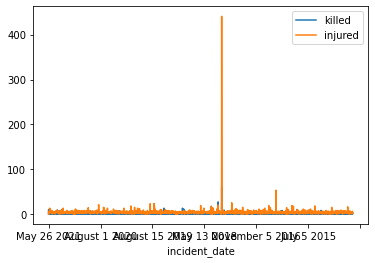

In [5]:
df.plot(x='incident_date', y=['killed','injured'])

Looking at a plot of killed and injured over incident_date shows multiple outliers with killed having a max of 59 and injured haveing a max of 441. These will have to be looked at and possibly removed. incident_date may also need to be simplified and split into years or months.

It would be nice to see a the amount of violence in each state. I will be looking at this be obtaining the sum of two columns, killed and injured, base on each state. 

##### After looking at the number of violence in each state the idea was built upon by comparing the violence to the population of the state. This was interesting to look at as the population of the states with high numbers of incidents vary significantly from states with low numbers of incidents

## Task 2

In [6]:
#step 1
import pandas as pd
import numpy as np
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")
df_pop = pd.read_csv("../data/raw/US_State_Population_2019.csv")

In [7]:
#step 2/3 split 'incident_date' to allow the removal of incidents from 2021 
df_clean = df.copy()

def clean_month(row):
    
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0]
    # Clean dataframe
    
def clean_year(row):
    
    years = ['2014','2015','2016','2017','2018','2019','2020','2021','2022'] 
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])
    # Clean dataframe
    
#split incident_date into two new columns named 'month' and 'year'
#month column for more general info and for possible research question on violence per month
#year column required for possible questions and to remove incomplete years
df_clean['month'] = df_clean.apply(lambda row: clean_month(row), axis=1)
df_clean['year'] = df_clean.apply(lambda row: clean_year(row), axis=1)
df_clean = df_clean.drop(['incident_id','address','city_or_county','incident_date'], axis=1)

#keeps only data from 2019 to match population data
df_clean = df_clean[df_clean['year'] == 2019]

In [8]:
#step 3 create a dataframe of the total violence and 
#violence per population in each state from 2019

states = df['state'].tolist()
states = set(states)
states = list(states)
states.sort()


state_code = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", 
                   "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", 
                   "MN", "MS", "MO", "MT", "NE", "NV", "NJ", "NM", "NY", "NC", "OH", 
                   "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", 
                   "WA", "WV", "WI", "WY"]

df_states = (
    pd.DataFrame(states)#creates new dataframe holding a row for each state
    .rename(columns = {0:'State'})
)
df_states['State_Code']=state_code

#get the sum of violence in each state and add it to the new dataframe
df_sumViolence = (
    pd.DataFrame(states)#creates new dataframe holding a row for each state
    .rename(columns = {0:'State'})
)
for s in states:
    df_sumViolence.at[states.index(s), "Killed"] = df_clean[df_clean['state'] == s]["killed"].sum()
    df_sumViolence.at[states.index(s), "Injured"] = df_clean[df_clean['state'] == s]["injured"].sum()
    
df_sumViolence = pd.merge(df_states, df_sumViolence, how='left')
    
#Merge dataframe of total violence to population dataframe into new dataframe df_vpp (Violence Per Population)
df_vpp = (
    pd.merge(df_sumViolence, df_pop, how="outer",)
    .dropna()
    .assign(Death_Percent=lambda x : x.Killed / x.Population_2019 * 100)
    .assign(Injured_Percent=lambda x : x.Injured / x.Population_2019 * 100)
)


In [9]:
#step 4

df_vpp = df_vpp[['State','State_Code','Population_2019','Killed','Death_Percent','Injured','Injured_Percent']]


## Task 3

In [10]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import plotly.express as px

from project_functions3 import load_and_process
df = load_and_process("../data/raw/US_Gun_Violence_Data.csv")
df_pop = pd.read_csv("../data/raw/US_State_Population_2019.csv")

In [12]:
from project_functions3 import sum_column
df_summed = sum_column(df, 'State', 'Killed', 'Injured')


In [13]:
from project_functions3 import violence_per_population
df_vpp = violence_per_population(df_summed,df_pop)

## Task 4

### Total Violence by State

In this analysis I will be looking how the amount of deaths and injuries in each state are related to their neighbouring states. After createing processing the data and creating a dataframe with the sum of violence in each state I was able to create two maps, one showing the total number of deaths in each state and the second showing the total number of injuries. These will be looked at to analyze the relation between neighbouring states.

In [ ]:
fig = px.choropleth(df_summed,
                    locations='State_Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Killed',
                    color_continuous_scale="hot_r", 
                    hover_name="State",
                    title="Number of Deaths 2019"
                    )
fig.show()

In [16]:
fig = px.choropleth(df_summed,
                    locations='State_Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Injured',
                    color_continuous_scale="hot_r", 
                    hover_name="State",
                    title="Number of Injuries 2019"
                    )
fig.show()

Before creating these geographical maps my question that I wanted to take a look at was whether or not states with high levels of violence  influence may have influence on neighbouring states, since just looking at graphs displaying the violence pre state can’t answer this without previous knowledge of which states border each state.
As seen in the above graphs, each state in the data frame is coloured in based on the levels of violence recorded from 2014 till 2020 with the darker states having higher levels. These colours can be referenced to the legend on the right for an estimate on the actual number. The actual number can be seen by hovering over the desired state. 
Looking at both graphs you can see that the states with the lowest amounts of violence are usually the farthest from the deadlier states like Texas and California. Even with the other violent states Illinois and Florida, their neighbouring states also have a considerably number of deaths and injuries which can be scene on both graphs.

### Percent of Violence per Population

Now looking at these high and low violent states, the question comes up about why this may be. One reason for the high and low values is the total population of the state. It’s believable for states with a high population to have higher counts of violence with the opposite being true for states with a lower population. So by just interpreting the total amount of violence in each state, one can not say that their change of being injured is the highest in the states with the highest number of violence without considering the probability of being a person that’s injured or killed in a state of hundreds of thousands other inhabitants.

So to answer which states are the most violent I brought in another dataset of the population in each state to use in the comparison of violence per population. The first states to look at where the four states from the previous graphs that had the highest total of violence actually had a lower percent of violence


In [18]:
#df_vpp.sort_values(by='Killed', ascending=False).head()

State | Total Killed | Percent Killed by Population
-|-|-
Texas | 303 | 0.00105% killed
California | 300 | 0.00076% killed
Florida	| 246 | 0.00114% killed
Illinios | 185 | 0.00146% killed

These were lower numbers compared to the states with the highest percents being

State | Total Killed | Total Killed per Population
-|-|-
Nevada | 80	| 0.00259% killed
Mississippi | 68 | 0.00228% killed
Louisiana | 104	| 0.00228% killed
New Mexico | 37 | 0.00176% killed



In [19]:
#df_vpp.sort_values(by='Death_Percent', ascending=False).head()

In [20]:
fig = px.choropleth(df_vpp,
                    locations='State_Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Death_Percent',
                    color_continuous_scale="hot_r", 
                    hover_name="State",
                    title="Percent of Deaths per Population by States 2019"
                    )
fig.show()

Looking back at the original question if a states surrounding states could possibly influence the amount of violence. While the states with the Toal number of violence had a small percent of violence, their neighbouring states had higher percents. Taking a look at California which had the second highest number of deaths in 2019, its neighbouring state Nevada had the highest percent of deaths per population, likewise with Texas, two of its neighbouring states New Mexico and Louisiana had percents as well even though they both had a relatively smaller population. 

In [21]:
fig = px.choropleth(df_vpp,
                    locations='State_Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Injured_Percent',
                    color_continuous_scale="hot_r", 
                    hover_name="State",
                    title="Percent of Injuries per Population by States 2019",
                    )
fig.show()

Switching over to the percent of injuries, this seems to only hold true for Nevada which had the highest percent of injuries per population. The neighbouring state to Califronia which had the second highest number of injuries in 2019. Asides from Nevada and perhaps Louisiana, most states has a surprisingly low percentage of injuries per population.  

### Conclusion

So from this it appears that these states with the most violence and their large populations could be affecting the amounts of violence in their neighbouring states. The maps and data have shown the levels of violence surrounding the most violent states to be at a higher percent of violence condsidering their lower population.